<a href="https://colab.research.google.com/github/SantosAbimaelRomero/Marriage-Age-in-US/blob/main/Data_Viz_Practice_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Stack 1/Week 4: Explanatory Viz/Files and Notes/Median Age at First Marriage .csv')

In [ ]:
df.head()

,FIPS,Name,Type,TimeFrame,Median Age,Population Density per Sq Mi
0,1,Alabama,State,2006-2010,25.5,94.4
1,2,Alaska,State,2006-2010,24.8,1.2
2,4,Arizona,State,2006-2010,25.6,56.3
3,5,Arkansas,State,2006-2010,24.5,56.0
4,6,California,State,2006-2010,26.9,239.1


# Purpose

With this data, we are checking to see the average age of women when they marry for the first time.

# Data Prep

## Extra Columns

The FIPS column is not necessary for our purpose with the data

In [ ]:
df.drop(columns='FIPS', inplace=True)

## Missing Values

In [ ]:
# No missing values
df.isna().sum()

Name                            0
Type                            0
TimeFrame                       0
Median Age                      0
Population Density per Sq Mi    0
dtype: int64

## Incorrect Values

In [ ]:
df['Name'].value_counts()

Alabama                 2
Alaska                  2
Nevada                  2
New Hampshire           2
New Jersey              2
New Mexico              2
New York                2
North Carolina          2
North Dakota            2
Ohio                    2
Oklahoma                2
Oregon                  2
Pennsylvania            2
Rhode Island            2
South Carolina          2
South Dakota            2
Tennessee               2
Texas                   2
Utah                    2
Vermont                 2
Virginia                2
Washington              2
West Virginia           2
Wisconsin               2
Wyoming                 2
Nebraska                2
Montana                 2
Missouri                2
Idaho                   2
Arizona                 2
Arkansas                2
California              2
Colorado                2
Connecticut             2
Delaware                2
District of Columbia    2
Florida                 2
Georgia                 2
Hawaii      

In [ ]:
df['Type'].value_counts()

State      102
Country      2
Name: Type, dtype: int64

In [ ]:
df['TimeFrame'].value_counts()

2006-2010    52
2015-2019    52
Name: TimeFrame, dtype: int64

No mislabeled values

## Duplicates and Organizing

First I am splitting the data into two sets separated by TimeFrame

In [ ]:
df1 = df[df['TimeFrame'] == '2006-2010']
display(df1.head())
df1.info()

,Name,Type,TimeFrame,Median Age,Population Density per Sq Mi
0,Alabama,State,2006-2010,25.5,94.4
1,Alaska,State,2006-2010,24.8,1.2
2,Arizona,State,2006-2010,25.6,56.3
3,Arkansas,State,2006-2010,24.5,56.0
4,California,State,2006-2010,26.9,239.1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          52 non-null     object 
 1   Type                          52 non-null     object 
 2   TimeFrame                     52 non-null     object 
 3   Median Age                    52 non-null     float64
 4   Population Density per Sq Mi  52 non-null     float64
dtypes: float64(2), object(3)
memory usage: 2.4+ KB


In [ ]:
df1.duplicated().value_counts()

False    52
dtype: int64

No duplicates in the first dataframe

In [ ]:
df2 = df[df['TimeFrame'] == '2015-2019']
display(df2.head())
df2.info()

,Name,Type,TimeFrame,Median Age,Population Density per Sq Mi
52,Alabama,State,2015-2019,26.7,99.2
53,Alaska,State,2015-2019,26.4,1.3
54,Arizona,State,2015-2019,27.8,63.0
55,Arkansas,State,2015-2019,25.7,57.9
56,California,State,2015-2019,29.0,254.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 52 to 103
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          52 non-null     object 
 1   Type                          52 non-null     object 
 2   TimeFrame                     52 non-null     object 
 3   Median Age                    52 non-null     float64
 4   Population Density per Sq Mi  52 non-null     float64
dtypes: float64(2), object(3)
memory usage: 2.4+ KB


In [ ]:
df2.duplicated().value_counts()

False    52
dtype: int64

No duplicates in the second dataframe either

# Visualizations

In [ ]:
# Get the US average
us_ave1 = df1[df1['Name'] == 'United States']
us_ave1

,Name,Type,TimeFrame,Median Age,Population Density per Sq Mi
51,United States,Country,2006-2010,26.3,87.4


In [ ]:
# Get the US average
us_ave2 = df2[df2['Name'] == 'United States']
us_ave2

,Name,Type,TimeFrame,Median Age,Population Density per Sq Mi
103,United States,Country,2015-2019,28.0,94.8


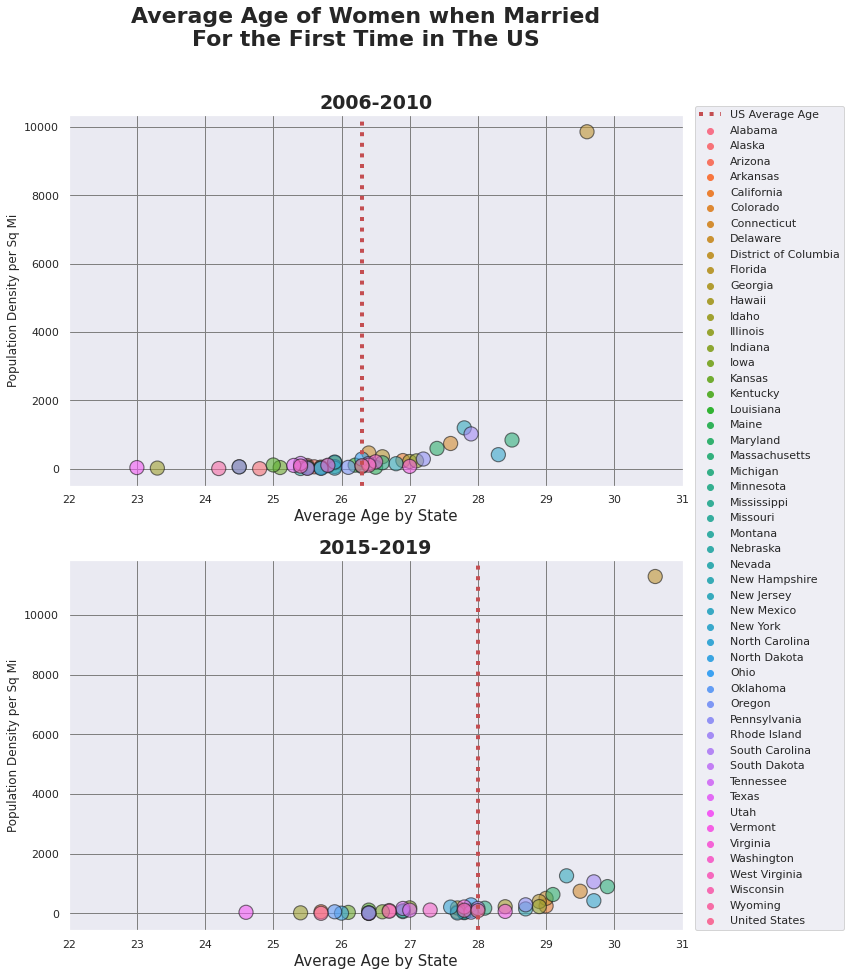

In [122]:
fig, axes = plt.subplots(nrows = 2, figsize = (11,15))
sns.set(style='darkgrid')


sns.scatterplot(data=df1, x='Median Age', y='Population Density per Sq Mi', 
                hue='Name', legend=None, s=200, alpha=0.60, edgecolor='k',
                ax=axes[0])
axes[0].set_title("2006-2010", fontsize=19, fontweight='bold')
axes[0].axvline(us_ave1['Median Age'].values, color='r', linestyle=':', 
                linewidth=4)
axes[0].grid(c = 'grey')
axes[0].set_xlabel('Average Age by State', fontsize=15)
axes[0].set_xlim(left=22, right=31)


sns.scatterplot(data=df2, x='Median Age', y='Population Density per Sq Mi', 
                hue='Name', s=200, alpha=0.60, edgecolor='k', ax=axes[1])
axes[1].set_title("2015-2019", fontsize=19, fontweight='bold')
axes[1].axvline(us_ave2['Median Age'].values, color='r', linestyle=':', 
                label='US Average Age', linewidth=4)
axes[1].grid(c = 'grey')
axes[1].set_xlabel('Average Age by State', fontsize=15)
axes[1].legend(loc=(1.02, 0))
axes[1].set_xlim(left=22, right=31)

fig.suptitle("Average Age of Women when Married\nFor the First Time in The US", fontsize=22, fontweight='bold');

The correlation between population density and the average age a woman 
when first married stays about the same between the two time frames.

---

Minimal positive correlation: average age does seem to increase as population density increases

---

On average, women in the US are getting married about 1 and a half years later between 2015-2019 than they were back between 2006-2010